### Import PySpark and build a SparkSession

[GitHub Optimus](https://github.com/ironmussa/Optimus)

#### Imports

In [1]:
import warnings

import findspark
from optimus import Optimus
from pyspark.sql import SparkSession

findspark.init()
spark = SparkSession.builder.appName('MeetUp_optimus_pyspark').getOrCreate()

warnings.filterwarnings('ignore')

### Start with Optimus 

In [3]:
op = Optimus(master="local")

#### Read Data

In [4]:
df_items_meli = op.read.csv(
    '../data/train.csv',
    header=True
)

In [5]:
df_items_meli?

Type:        DataFrame
String form: DataFrame[title: string, label_quality: string, language: string, category: string]
File:        /opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py
Docstring:  
A distributed collection of data grouped into named columns.

A :class:`DataFrame` is equivalent to a relational table in Spark SQL,
and can be created using various functions in :class:`SparkSession`::

    people = spark.read.parquet("...")

Once created, it can be manipulated using the various domain-specific-language
(DSL) functions defined in: :class:`DataFrame`, :class:`Column`.

To select a column from the data frame, use the apply method::

    ageCol = people.age

A more concrete example::

    # To create DataFrame using SparkSession
    people = spark.read.parquet("...")
    department = spark.read.parquet("...")

    people.filter(people.age > 30).join(department, people.deptId == department.id) \
      .groupBy(department.name, "gender").agg({"salary": "avg", "age": 

### visualize data with Spark

In [6]:
df_train.show(20)

+--------------------+-------------+----------+--------------------+
|               title|label_quality|  language|            category|
+--------------------+-------------+----------+--------------------+
|Hidrolavadora Lav...|   unreliable|   spanish|ELECTRIC_PRESSURE...|
|Placa De Sonido -...|   unreliable|   spanish|         SOUND_CARDS|
|Maquina De Lavar ...|   unreliable|portuguese|    WASHING_MACHINES|
|Par Disco De Frei...|   unreliable|portuguese| VEHICLE_BRAKE_DISCS|
|Flashes Led Pesta...|   unreliable|   spanish|     FALSE_EYELASHES|
|4 Microaspersor I...|   unreliable|portuguese|IRRIGATION_SPRINK...|
|Raquete Clash 100...|   unreliable|portuguese|            RACQUETS|
|Kit Tripe Para Ce...|   unreliable|portuguese|      CAMERA_TRIPODS|
|Filtro Ar Bonanza...|   unreliable|portuguese|AUTOMOTIVE_AIR_FI...|
|Gatito Lunchera N...|   unreliable|   spanish|          LUNCHBOXES|
|Condensador Bosch...|   unreliable|portuguese|   CAR_AC_CONDENSERS|
|Rosario Contador ...|   unreliabl

### visualize data with Optimus

In [7]:
df_items_meli.table(20)

title 1 (string) nullable,label_quality 2 (string) nullable,language 3 (string) nullable,category 4 (string) nullable
Hidrolavadora⋅Lavor⋅One⋅120⋅Bar⋅1700w⋅⋅Bomba⋅Aluminio⋅Italia,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
Placa⋅De⋅Sonido⋅-⋅Behringer⋅Umc22,unreliable,spanish,SOUND_CARDS
Maquina⋅De⋅Lavar⋅Electrolux⋅12⋅Kilos,unreliable,portuguese,WASHING_MACHINES
Par⋅Disco⋅De⋅Freio⋅Diant⋅Vent⋅Gol⋅8v⋅08/⋅Fremax⋅Bd5298,unreliable,portuguese,VEHICLE_BRAKE_DISCS
Flashes⋅Led⋅Pestañas⋅Luminoso⋅Falso⋅Pestañas⋅Para⋅Partido⋅,unreliable,spanish,FALSE_EYELASHES
"4⋅Microaspersor⋅Irrigação⋅Ultra⋅7,20⋅Metros",unreliable,portuguese,IRRIGATION_SPRINKLERS
Raquete⋅Clash⋅100⋅Tour⋅-⋅Nova,unreliable,portuguese,RACQUETS
"Kit⋅Tripe⋅Para⋅Celular⋅Ou⋅Câmera⋅Fotog⋅1,20m⋅+⋅Brinde⋅+⋅Nf-e",unreliable,portuguese,CAMERA_TRIPODS
Filtro⋅Ar⋅Bonanza⋅1984/1990⋅Sar3589,unreliable,portuguese,AUTOMOTIVE_AIR_FILTERS
Gatito⋅Lunchera⋅Neoprene⋅,unreliable,spanish,LUNCHBOXES


### Graficar Dataframe con Spark

Generar los cálculos con Spark y luego pasar a pandas

*Spark nativo no tiene implementado gráficos*

In [19]:
df_items_language_gb_pd = df_items_meli.groupby('language').count().toPandas()

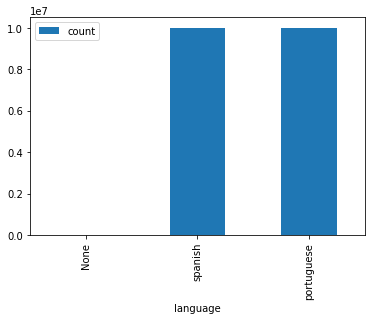

In [28]:
df_items_language_gb_pd.plot.bar(x='language',y='count')

### Graficar Dataframe con Optimus

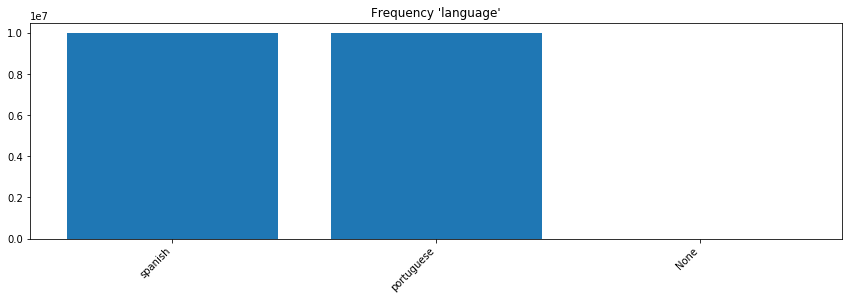

In [20]:
df_items_meli.plot.frequency('language')

#### Vista general del dataframe

Including 'nan' as Null in processing 'title'
Including 'nan' as Null in processing 'label_quality'
Including 'nan' as Null in processing 'language'
Including 'nan' as Null in processing 'category'
Including 'nan' as Null in processing 'title'
Including 'nan' as Null in processing 'label_quality'
Including 'nan' as Null in processing 'language'
Including 'nan' as Null in processing 'category'


Number of columns,4
Number of rows,20000000
Total Missing (%),0.0%
Total size in memory,-1 Bytes
String,4
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,20105291

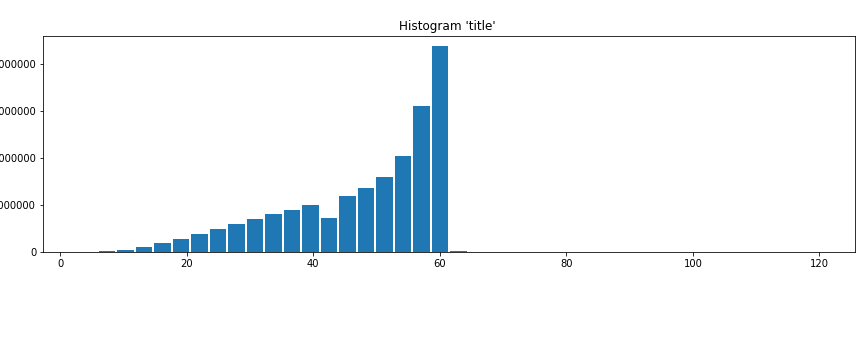
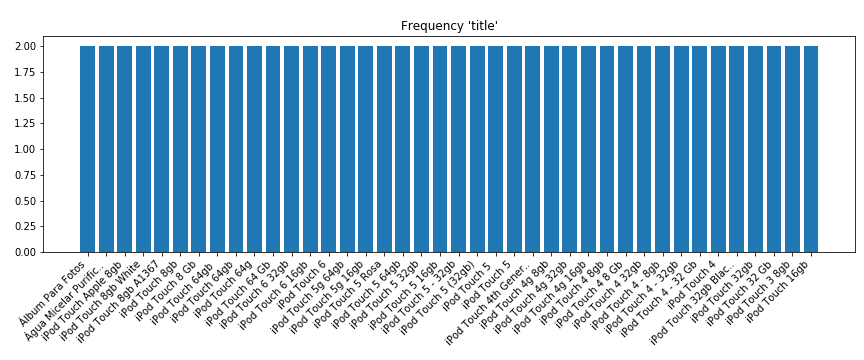
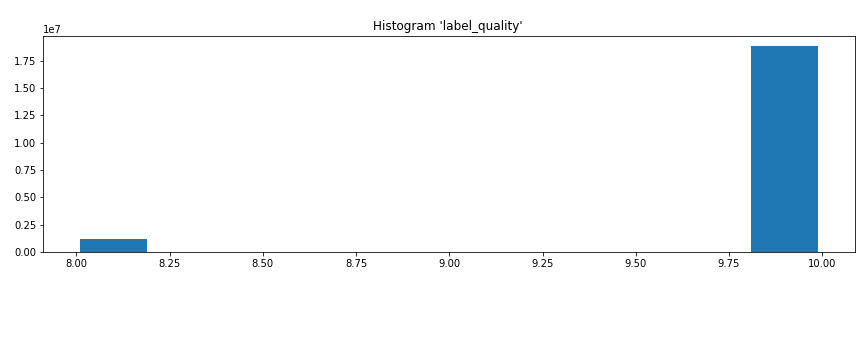
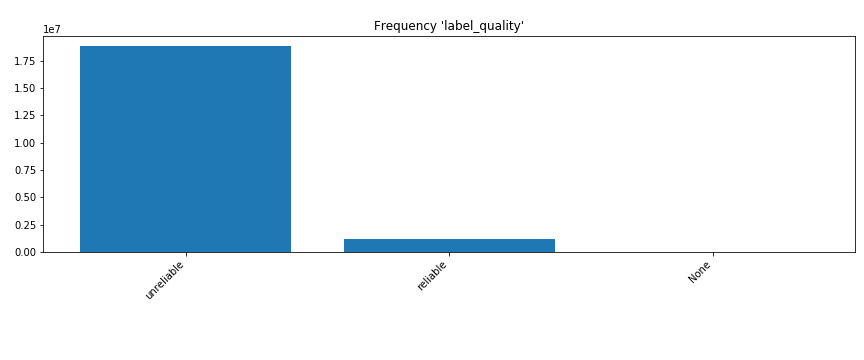
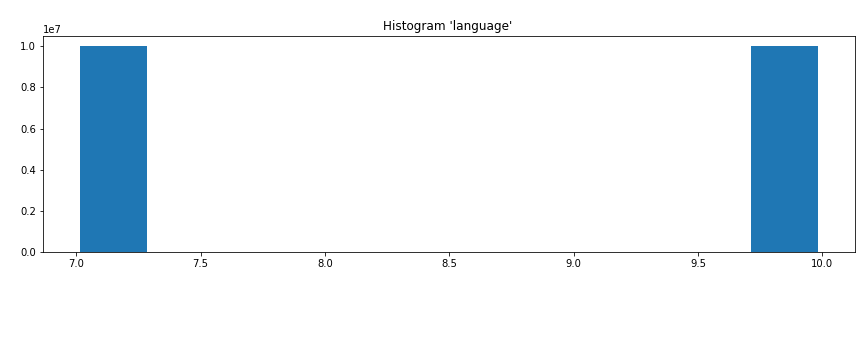
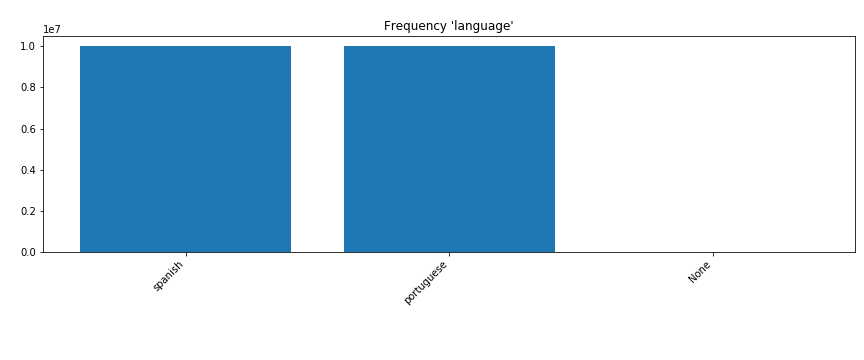
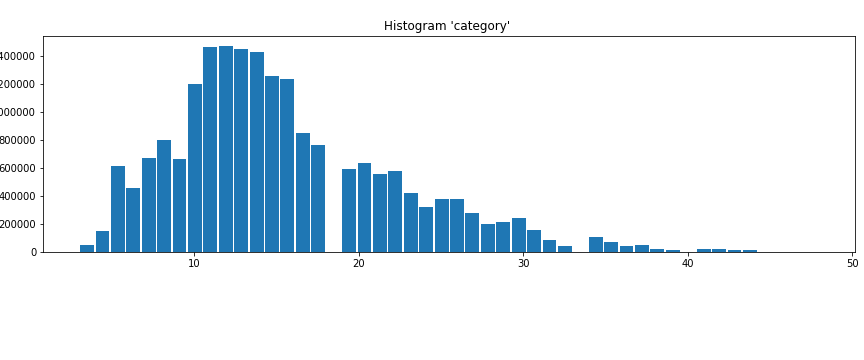
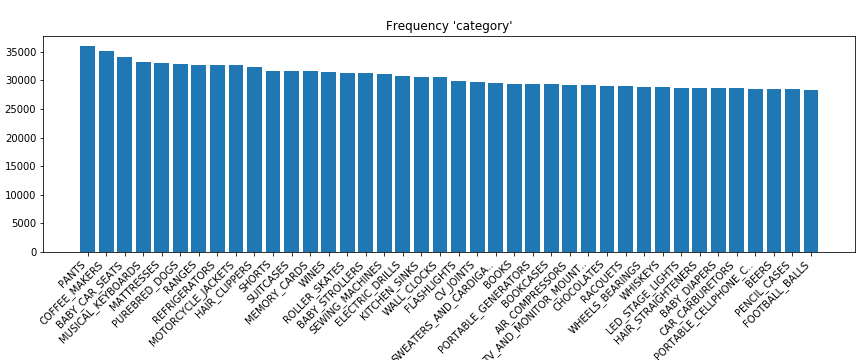

In [13]:
op.profiler.run(df_items_meli, columns=df_items_meli.columns, infer=False)